<div align="center">

# ***Polynomial Regression***

---
---

</div>

## 1. Introduction

Khi mà dữ liệu của chúng ta phức tạp hơn là một đường thẳng. Bởi nếu có dạng là một đường thẳng thì ta có thể sử dụng mô hình LinearRegression đơn giản: 
$$
f_x = wx + b 
$$
Nhưng khi nó phức tạp hơn, dữ liệu non-linear. Thì ta có thể sử dụng linear model để 'fit' non-linear data. Kỹ thuật này gọi là `polynomial regression`

+ **NOTE**: Tuyến tính không có nghĩa là đường thẳng hay bậc 1. Trong ML, tuyến tính nghĩa là tuyến tính theo tham số (w, b) hay trong biểu thức, chỉ có các w (weight) nhân với features và cộng với nhau, không có nhân giữa các tham số với nhau (w1*w2,...) và không có các phi tuyến cho w như sin(w), bình phương,...
Ví dụ: 
$$
y^​=w_0​+w_1​x_1​+w_2​x_2​+...+w_n​x_n
$$

In [1]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
SEED_POLY = 21
np.random.seed(SEED_POLY)

m = 111
# Generate random m point x
X = 7 * np.random.rand(m, 1) - 3
# y = ax^2 + bx + c
y = 0.5*X**2 + X + 5 + np.random.rand(m, 1)

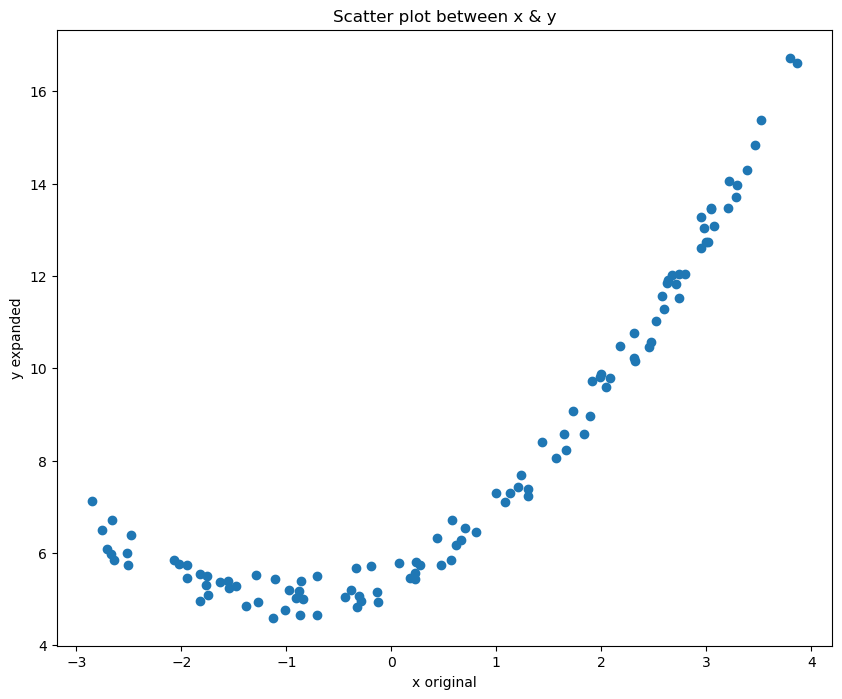

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(x=X, y=y)
plt.xlabel("x original")
plt.ylabel("y expanded")
plt.title("Scatter plot between x & y")
plt.show()

## 2. Expand the data using `Polynomial Regression` technique

- Ở trường hợp này ta mở rộng thêm một trường dữ liệu mới $x^2$ khi đó ta có:
    
$$
X_{poly} = [x, x^2]
$$

Sử dụng model linear: LinearRegression với 2 features là x và $x^2$.
Lúc này, mô hình của chúng ta vẫn tuyến tính, tuyến tính theo w, bởi nó vẫn đúng là nhân và cộng các *w* với *features*, nhưng trong đó có một features bậc 2

- Từ đó, ta có biểu thức cho linear model: 

$$
\hat{y} = w_1x + w_2x^2 + b
$$

In [4]:
# Create new polynomial features x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# fit_transform(): fit the model and apply the transformation
# Square each value in X to second columns in X_poly -> X_poly has 2 columns
X_poly = poly_features.fit_transform(X)

print(X[0])
print(f"X_poly contain original X and x^2 (square): {X_poly[0]}")

X_poly.shape


[-2.65892583]
X_poly contain original X and x^2 (square): [-2.65892583  7.06988659]


(111, 2)

### 2.1 Fit model LinearRegression với data đã extended $[x, x^2]$

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Hyperparameters:
# intercept_ = c    (constant term)
# coef_ = [b, a]    (NOTE the order) 
print(f"Model trained successfully. Hyperparameters:\n{lin_reg.intercept_, lin_reg.coef_}")

# lin_reg.coef_[1]  # IndexError: index 1 is out of bounds for axis 0 with size 1
lin_reg.coef_[0][1]  # a
lin_reg.coef_[0][0]  # b


Model trained successfully. Hyperparameters:
(array([5.50124427]), array([[0.99324228, 0.49668247]]))


np.float64(0.9932422822527175)

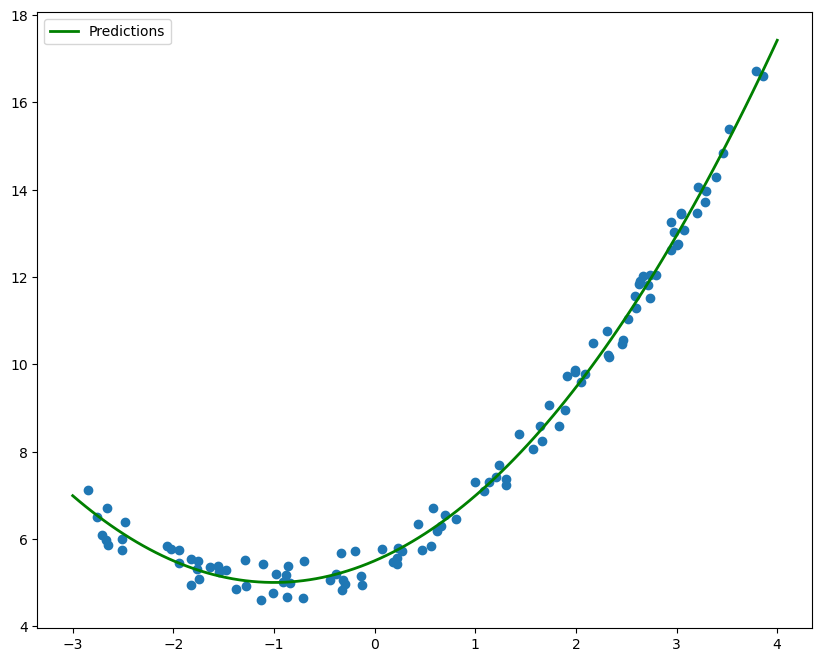

In [6]:
#--- Visualize the result:
# Generate X
X_visual = np.linspace(-3, 4, 111).reshape(111, 1)
# Transform X to poly 
X_visual_poly = poly_features.transform(X_visual)
y_pred = lin_reg.predict(X_visual_poly)

# Scatter + Plot
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.plot(X_visual, y_pred, color='g', linewidth=2, label='Predictions')
plt.legend()
plt.show()


# print(X_visual.shape)
# X_visual

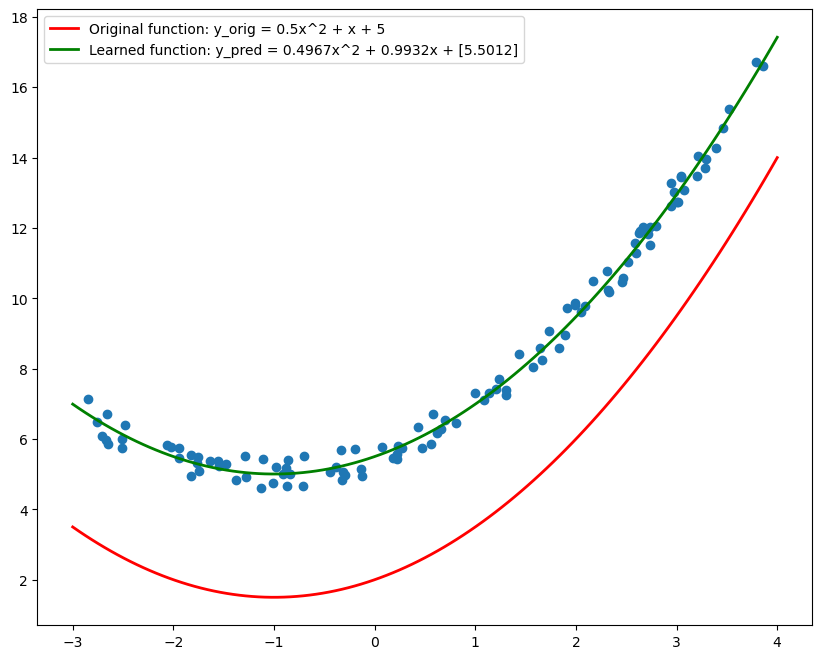

In [7]:
# Compare the original function and the learned function
y_assumption = 0.5*X_visual**2 + X_visual + 2
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.plot(X_visual, y_assumption, color='r', linewidth=2, label='Original function: y_orig = 0.5x^2 + x + 5')
plt.plot(X_visual, y_pred, color='g', linewidth=2, label=f'Learned function: y_pred = {lin_reg.coef_[0][1].round(4)}x^2 + {lin_reg.coef_[0][0].round(4)}x + {lin_reg.intercept_.round(4)}')
plt.legend()
plt.show()

### 2.2 Plot between x original, $x^2$ and y

Có thể hình dung theo (theo góc nhìn hình học), trong không gian 3D, x và $x^2$ tạo thành một mặt phẳng (ở dưới) và y là chiều cao. Hay nói cách khác, ta đang biến đổi dữ liệu vào chiều không gian mới, không gian 3D. Còn khi không có features mới $x^2$, ta giảm chiều dữ liệu về không gian 2D, dưới góc nhìn của 2D, mặt phẳng trong không gian 3D mới tạo 'in' vào không gian 2D với trục x và y (ban đầu) cho ta một hình parabol. 

- Scatter plot giữa x và $x^2$

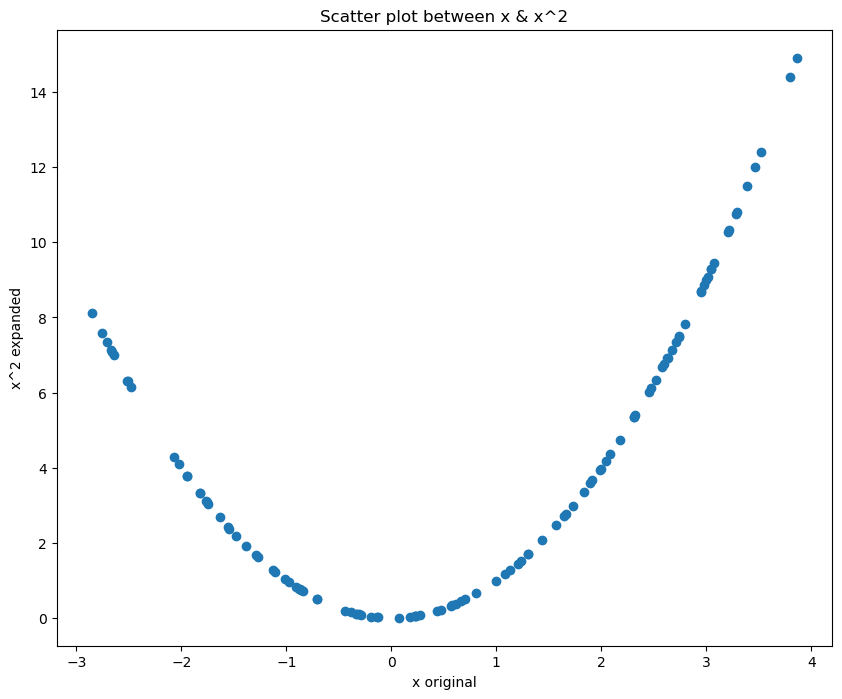

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(x=X_poly[:, 0], y=X_poly[:, 1])
plt.xlabel("x original")
plt.ylabel("x^2 expanded")
plt.title("Scatter plot between x & x^2")
plt.show()

- Thêm trục y (dữ liệu minh họa ngẫu nhiên)

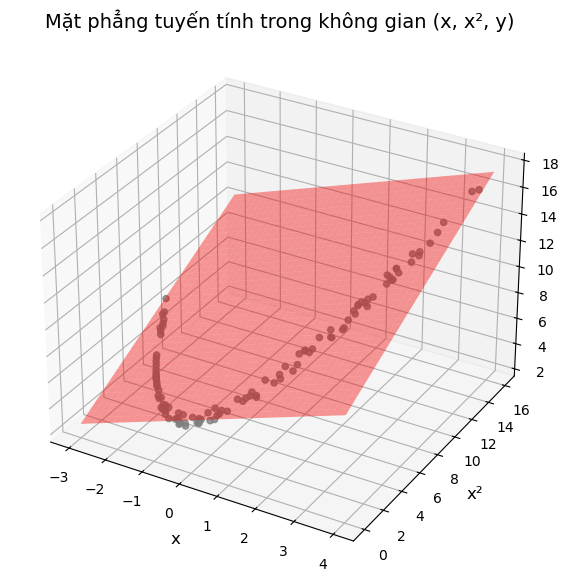

Learned function: y = 0.497x² + 0.993x + 5.501


In [9]:

# ----- HUẤN LUYỆN MÔ HÌNH TUYẾN TÍNH -----
lin_reg_3d = lin_reg
lin_reg_3d.fit(X_poly, y)

# ----- TẠO LƯỚI VẼ MẶT PHẲNG -----
x_surf = np.linspace(-3, 4, 40)
x2_surf = np.linspace(0, 16, 40)  # vì (4)^2 = 16
X_surf, X2_surf = np.meshgrid(x_surf, x2_surf)

# Tính giá trị y dự đoán trên mặt phẳng
Y_surf = (
    lin_reg_3d.intercept_[0]
    + lin_reg_3d.coef_[0, 0] * X_surf
    + lin_reg_3d.coef_[0, 1] * X2_surf
)

# ----- VẼ 3D -----
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Các điểm dữ liệu gốc (x, x², y)
ax.scatter(X, X**2, y, color="gray", alpha=0.8, label="Dữ liệu (x, x², y)")

# Mặt phẳng tuyến tính học được trong không gian (x, x², y)
ax.plot_surface(X_surf, X2_surf, Y_surf, color="red", alpha=0.4, rstride=1, cstride=1)

# Nhãn và góc nhìn
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("x²", fontsize=12)
ax.set_zlabel("y", fontsize=12)
ax.set_title("Mặt phẳng tuyến tính trong không gian (x, x², y)", fontsize=14)
# ax.view_init(elev=25, azim=120)

plt.show()

# In ra phương trình học được
print(f"Learned function: y = {lin_reg_3d.coef_[0,1]:.3f}x² + {lin_reg_3d.coef_[0,0]:.3f}x + {lin_reg_3d.intercept_[0]:.3f}")


- Giảm chiều về 2D với x original và y

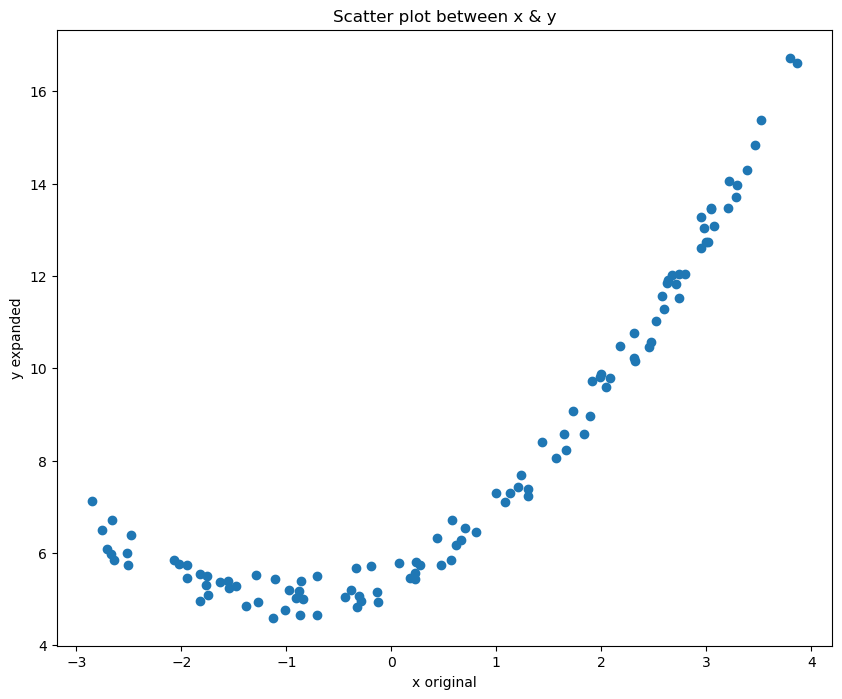

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(x=X, y=y)
plt.xlabel("x original")
plt.ylabel("y expanded")
plt.title("Scatter plot between x & y")
plt.show()

## The end